In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('ushape.csv')

In [ ]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [ ]:
df.shape

(99, 3)

In [ ]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

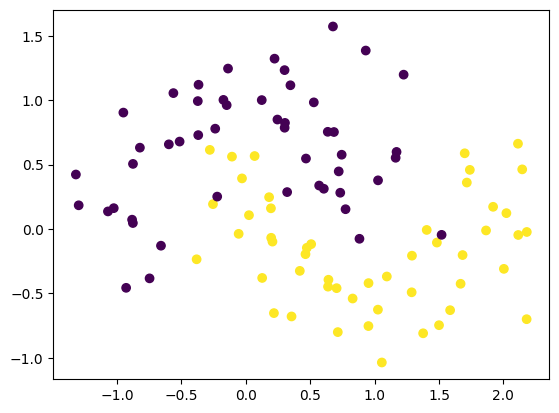

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X,y)


LogisticRegression()

<Axes: >

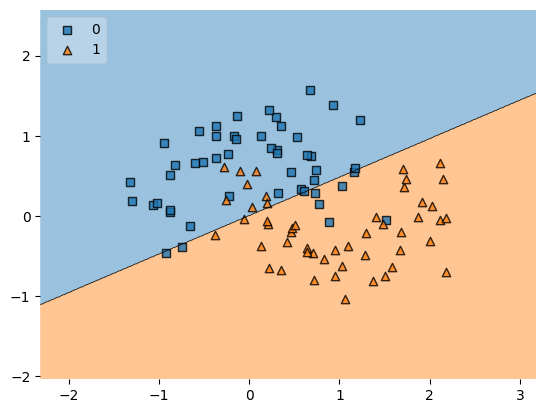

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),lr,legend=2)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
np.mean(cross_val_score(lr,X,y,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=3,include_bias=False)
X_trf= poly.fit_transform(X)


In [ ]:
lr1= LogisticRegression()

In [ ]:
np.mean(cross_val_score(lr1,X_trf,y,scoring='accuracy', cv=10))

np.float64(0.9099999999999999)

In [ ]:

def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

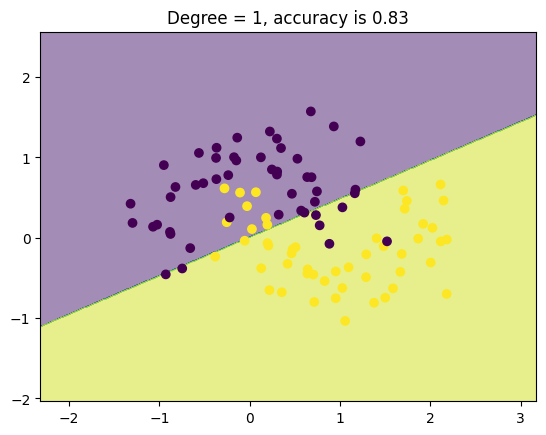

In [ ]:
plot_decision_boundary(X,y)

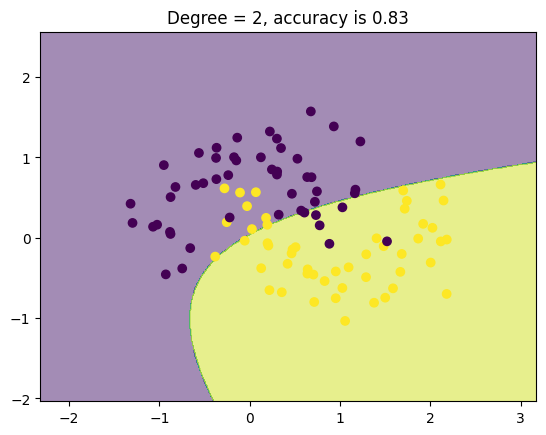

In [ ]:
plot_decision_boundary(X,y,degree=2)

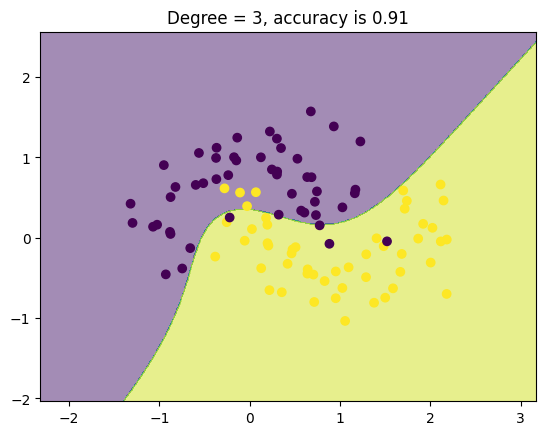

In [ ]:
plot_decision_boundary(X,y,degree=3)

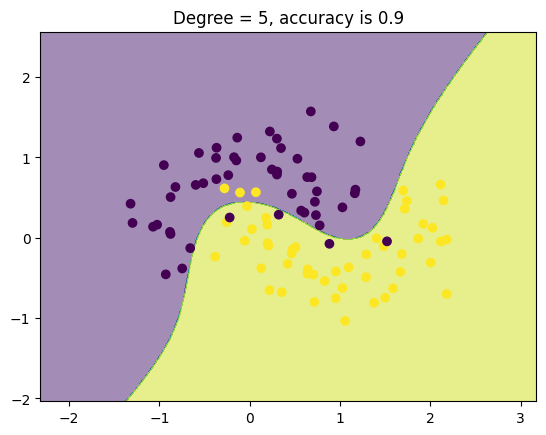

In [ ]:
plot_decision_boundary(X,y,degree=5)
